_Lambda School Data Science — Classification & Validation_ 

# Random Forests & Gradient Boosting

### Setup on Google Colab

In [188]:
# !pip install category_encoders

In [189]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [190]:
import xgboost
xgboost.__version__

'0.80'

### Gradient Boosting and Random Forest are often the best choice for “Spreadsheet Machine Learning.”
- Meaning, [Tree Ensembles often have the best predictive accuracy](https://arxiv.org/abs/1708.05070) for supervised learning with structured, tabular data.
- Because trees can fit non-linear, non-monotonic relationships, and interactions between features.
- A single decision tree, grown to unlimited depth, will overfit. We solve this problem by ensembling trees, with bagging or boosting.
- One-hot encoding isn’t the only way, and may not be the best way, of categorical encoding for tree ensembles.



### Links

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [How a Russian mathematician constructed a decision tree - by hand - to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- [Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
- [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
- [A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)
- [How to explain gradient boosting](https://explained.ai/gradient-boosting/index.html)

#### Python libraries for Gradient Boosting
- [scikit-learn Gradient Tree Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting) — slower than other libraries, but [the next version may be better](https://twitter.com/amuellerml/status/1123613520426426368)
  - Anaconda: already installed
  - Google Colab: already installed
- [xgboost](https://xgboost.readthedocs.io/en/latest/) — can accept missing values and enforce [monotonic constraints](https://xiaoxiaowang87.github.io/monotonicity_constraint/)
  - Anaconda, Mac/Linux: `conda install -c conda-forge xgboost`
  - Windows: `pip install xgboost`
  - Google Colab: already installed
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/) — can accept missing values and enforce [monotonic constraints](https://blog.datadive.net/monotonicity-constraints-in-machine-learning/)
  - Anaconda: `conda install -c conda-forge lightgbm`
  - Google Colab: already installed
- [CatBoost](https://catboost.ai/) — can accept missing values and use [categorical features](https://catboost.ai/docs/concepts/algorithm-main-stages_cat-to-numberic.html) without preprocessing
  - Anaconda: `conda install -c conda-forge catboost`
  - Google Colab: `pip install catboost`

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- [Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)
- [Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

# Golf Putts (regression, 1 feature, non-linear)

https://statmodeling.stat.columbia.edu/2008/12/04/the_golf_puttin/

In [191]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

putts = pd.DataFrame(
    columns=['distance', 'tries', 'successes'], 
    data = [[2, 1443, 1346],
            [3, 694, 577],
            [4, 455, 337],
            [5, 353, 208],
            [6, 272, 149],
            [7, 256, 136],
            [8, 240, 111],
            [9, 217, 69],
            [10, 200, 67],
            [11, 237, 75],
            [12, 202, 52],
            [13, 192, 46],
            [14, 174, 54],
            [15, 167, 28],
            [16, 201, 27],
            [17, 195, 31],
            [18, 191, 33],
            [19, 147, 20],
            [20, 152, 24]]
)

putts['rate of success'] = putts['successes'] / putts['tries']
putts_X = putts[['distance']]
putts_y = putts['rate of success']

#### Docs
- [Scikit-Learn User Guide: Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests) (`from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier`)
- [XGBoost Python API Reference: Scikit-Learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) (`from xgboost import XGBRegressor, XGBClassifier`)

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

def putt_trees(max_depth=1, n_estimators=1):
    models = [DecisionTreeRegressor(max_depth=max_depth), 
              RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators), 
              XGBRegressor(max_depth=max_depth, n_estimators=n_estimators)]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(putts_X, putts_y)
        ax = putts.plot('distance', 'rate of success', kind='scatter', title=name)
        ax.step(putts_X, model.predict(putts_X), where='mid')
        plt.show()
        
interact(putt_trees, max_depth=(1,6,1), n_estimators=(10,40,10));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=10, descripti…

### Bagging
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

In [193]:
# Do-it-yourself Bagging Ensemble of Decision Trees (like a Random Forest)
def diy_bagging(max_depth=1, n_estimators=1):
    y_preds = []
    for i in range(n_estimators):
        title = f'Tree {i+1}'
        bootstrap_sample = putts.sample(n=len(putts), replace=True).sort_values(by='distance')
        bootstrap_X = bootstrap_sample[['distance']]
        bootstrap_y = bootstrap_sample['rate of success']
        tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(bootstrap_X, bootstrap_y)
        y_pred = tree.predict(bootstrap_X)
        y_preds.append(y_pred)
        ax = bootstrap_sample.plot('distance', 'rate of success', kind='scatter', title=title)
        ax.step(bootstrap_X, y_pred, where='mid')
        plt.show()
        
    ensembled = np.vstack(y_preds).mean(axis=0)
    title = f'Ensemble of {n_estimators} trees, with max_depth={max_depth}'
    ax = putts.plot('distance', 'rate of success', kind='scatter', title=title)
    ax.step(putts_X, ensembled, where='mid')
    plt.show()
    
interact(diy_bagging, max_depth=(1,6,1), n_estimators=(2,5,1));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=2, descriptio…

### What's "random" about random forests?
1. Each tree trains on a random bootstrap sample of the data. (In scikit-learn, for `RandomForestRegressor` and `RandomForestClassifier`, the `bootstrap` parameter's default is `True`.) This type of ensembling is called Bagging.
2. Each split considers a random subset of the features. (In scikit-learn, when the `max_features` parameter is not `None`.) 

For extra randomness, you can try ["extremely randomized trees"](https://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees)!

>In extremely randomized trees (see [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) and [ExtraTreesRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html) classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias

### Boosting 

Boosting (used by Gradient Boosting) is different than Bagging (used by Random Forests). 

[_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8.2.3, Boosting:

>Recall that bagging involves creating multiple copies of the original training data set using the bootstrap, fitting a separate decision tree to each copy, and then combining all of the trees in order to create a single predictive model.

>**Boosting works in a similar way, except that the trees are grown _sequentially_: each tree is grown using information from previously grown trees.**

>Unlike fitting a single large decision tree to the data, which amounts to _fitting the data hard_ and potentially overfitting, the boosting approach instead _learns slowly._ Given the current model, we fit a decision tree to the residuals from the model.

>We then add this new decision tree into the fitted function in order to update the residuals. Each of these trees can be rather small, with just a few terminal nodes. **By fitting small trees to the residuals, we slowly improve fˆ in areas where it does not perform well.**

>Note that in boosting, unlike in bagging, the construction of each tree depends strongly on the trees that have already been grown.

# Wave (regression, 1 feature, non-monotonic, train/test split)

http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [194]:
from sklearn.model_selection import train_test_split

def make_data():
    import numpy as np
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 2 * (0.5 - rng.rand(16))
    return X, y

wave_X, wave_y = make_data()
wave_X_train, wave_X_test, wave_y_train, wave_y_test = train_test_split(
    wave_X, wave_y, test_size=0.25, random_state=42)

In [195]:
def wave_trees(max_depth=1, n_estimators=10):
    models = [DecisionTreeRegressor(max_depth=max_depth), 
              RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators), 
              XGBRegressor(max_depth=max_depth, n_estimators=n_estimators)]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(wave_X_train, wave_y_train)
        print(f'{name} Train R^2 score:', model.score(wave_X_train, wave_y_train))
        print(f'{name} Test R^2 score:', model.score(wave_X_test, wave_y_test))
        plt.scatter(wave_X_train, wave_y_train)
        plt.scatter(wave_X_test, wave_y_test)
        plt.step(wave_X, model.predict(wave_X), where='mid')
        plt.show()
        
interact(wave_trees, max_depth=(1,8,1), n_estimators=(10,40,10));

interactive(children=(IntSlider(value=1, description='max_depth', max=8, min=1), IntSlider(value=10, descripti…

# Titanic (classification, 2 features, interactions, non-linear / non-monotonic)

#### viz2D helper function

In [196]:
def viz2D(fitted_model, X, feature1, feature2, num=100, title=''):
    """
    Visualize model predictions as a 2D heatmap
    For regression or binary classification models, fitted on 2 features
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    df : pandas dataframe, which was used to fit model
    feature1 : string, name of feature 1
    feature2 : string, name of feature 2
    target : string, name of target
    num : int, number of grid points for each feature
    
    Returns
    -------
    predictions: numpy array, predictions/predicted probabilities at each grid point
    
    References
    ----------
    https://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html
    https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
    """
    x1 = np.linspace(X[feature1].min(), X[feature1].max(), num)
    x2 = np.linspace(X[feature2].min(), X[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    
    plt.imshow(predicted.reshape(num, num), cmap='viridis')
    plt.title(title)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()
    return predicted

### Read data, encode categorical feature, impute missing values

In [197]:
import category_encoders as ce
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

titanic = sns.load_dataset('titanic')
features = ['age', 'sex']
target = 'survived'

preprocessor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer())
X = preprocessor.fit_transform(titanic[features])
X = pd.DataFrame(X, columns=features)
y = titanic[target]

X.head()

,age,sex
0,22.0,1.0
1,38.0,2.0
2,26.0,2.0
3,35.0,2.0
4,35.0,1.0


In [198]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [199]:
titanic.groupby('embark_town').pclass.value_counts()

embark_town  pclass
Cherbourg    1          85
             3          66
             2          17
Queenstown   3          72
             2           3
             1           2
Southampton  3         353
             2         164
             1         127
Name: pclass, dtype: int64

In [200]:
titanic.groupby('embark_town').survived.mean()

embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64

### Logistic Regression

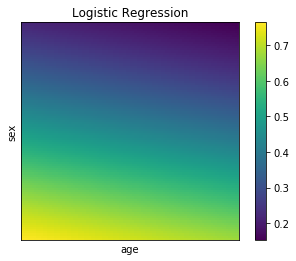

In [201]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)
viz2D(lr, X, feature1='age', feature2='sex', title='Logistic Regression');

### Decision Tree, Random Forest, Gradient Boosting

#### Docs
- [Scikit-Learn User Guide: Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests) (`from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier`)
- [XGBoost Python API Reference: Scikit-Learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) (`from xgboost import XGBRegressor, XGBClassifier`)

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

def titanic_trees(max_depth=1, n_estimators=1):
    models = [DecisionTreeClassifier(max_depth=max_depth), 
              RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators), 
              XGBClassifier(max_depth=max_depth, n_estimators=n_estimators)]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(X.values, y.values)
        viz2D(model, X, feature1='age', feature2='sex', title=name)
        
interact(titanic_trees, max_depth=(1,6,1), n_estimators=(10,40,10));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=10, descripti…

### Bagging

In [203]:
# Do-it-yourself Bagging Ensemble of Decision Trees (like a Random Forest)

def titanic_bagging(max_depth=1, n_estimators=1):
    predicteds = []
    for i in range(n_estimators):
        title = f'Tree {i+1}'
        bootstrap_sample = titanic.sample(n=len(titanic), replace=True)
        preprocessor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer())
        bootstrap_X = preprocessor.fit_transform(bootstrap_sample[['age', 'sex']])
        bootstrap_y = bootstrap_sample['survived']
        tree = DecisionTreeClassifier(max_depth=max_depth)
        tree.fit(bootstrap_X, bootstrap_y)
        predicted = viz2D(tree, X, feature1='age', feature2='sex', title=title)
        predicteds.append(predicted)
    
    ensembled = np.vstack(predicteds).mean(axis=0)
    title = f'Ensemble of {n_estimators} trees, with max_depth={max_depth}'
    plt.imshow(ensembled.reshape(100, 100), cmap='viridis')
    plt.title(title)
    plt.xlabel('age')
    plt.ylabel('sex')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()
        
interact(titanic_bagging, max_depth=(1,6,1), n_estimators=(2,5,1));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=2, descriptio…

### Select more features, compare models

In [204]:
from sklearn.preprocessing import MinMaxScaler

titanic['deck'] = titanic['deck'].astype(str)
features = ['age', 'sex', 'pclass', 'sibsp', 'parch', 'fare', 'deck', 'embark_town']
target = 'survived'

# MinMaxScaler() is a squishification function: it doesn't help or hurt the Dec. Trees too much
# but it does help with the interpretation of the model
preprocessor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer(), MinMaxScaler())
titanic_X = preprocessor.fit_transform(titanic[features])
titanic_X = pd.DataFrame(titanic_X, columns=features)
titanic_y = titanic[target]

titanic_X.head()

,age,sex,pclass,sibsp,parch,fare,deck,embark_town
0,0.271174,0.0,1.0,0.125,0.0,0.014151,0.000000,0.000000
1,0.472229,1.0,0.0,0.125,0.0,0.139136,0.142857,0.333333
2,0.321438,1.0,1.0,0.000,0.0,0.015469,0.000000,0.000000
3,0.434531,1.0,0.0,0.125,0.0,0.103644,0.142857,0.000000
4,0.434531,0.0,1.0,0.000,0.0,0.015713,0.000000,0.000000


In [205]:
from sklearn.model_selection import cross_val_score

models = [LogisticRegression(solver='lbfgs', max_iter=1000), 
          DecisionTreeClassifier(max_depth=3), 
          DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42), 
          RandomForestClassifier(max_depth=None, n_estimators=100, n_jobs=-1, random_state=42), 
          XGBClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42)]

for model in models:
    print(model, '\n')
    score = cross_val_score(model, titanic_X, titanic_y, scoring='accuracy', cv=5).mean()
    print('Cross-Validation Accuracy:', score, '\n', '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.7911905757420685 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Cross-Validation Accuracy: 0.8047054617955187 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0

### Feature importances

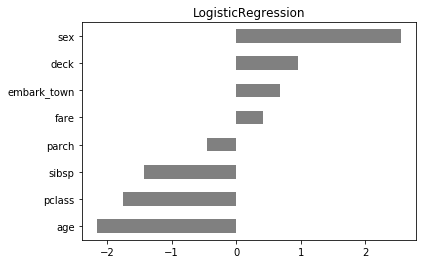

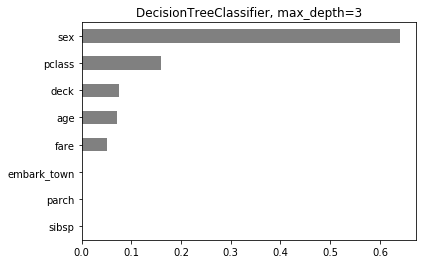

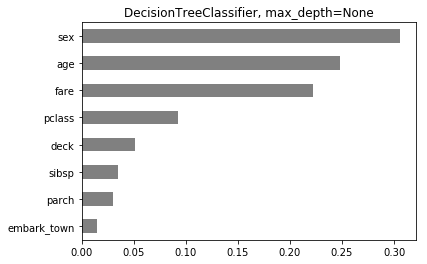

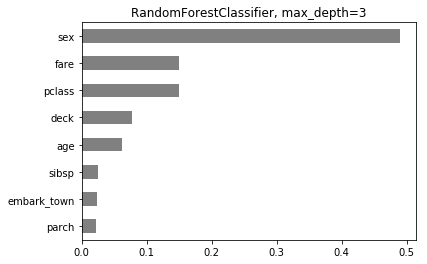

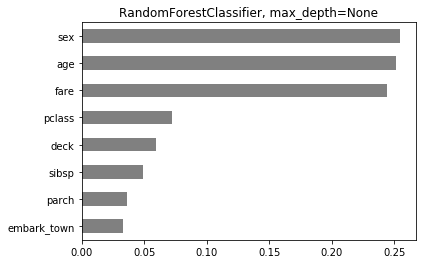

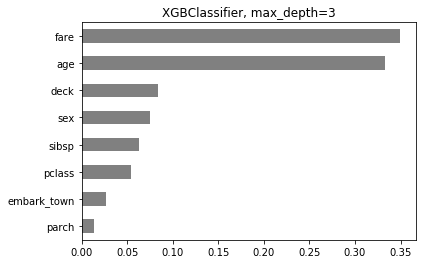

In [206]:
for model in models:
    name = model.__class__.__name__
    model.fit(titanic_X, titanic_y)
    if name == 'LogisticRegression':
        coefficients = pd.Series(model.coef_[0], titanic_X.columns)
        coefficients.sort_values().plot.barh(color='grey', title=name)
        plt.show()
    else:
        importances = pd.Series(model.feature_importances_, titanic_X.columns)
        title = f'{name}, max_depth={model.max_depth}'
        importances.sort_values().plot.barh(color='grey', title=title)
        plt.show()

# ASSIGNMENT

**Train Random Forest and Gradient Boosting models**, on the Bank Marketing dataset. (Or another dataset of your choice, not used during this lesson.) You may use any Python libraries for Gradient Boosting.

Then, you have many options!

#### Keep improving your model
- **Try new categorical encodings.**
- Explore and visualize your data. 
- Wrangle [bad data](https://github.com/Quartz/bad-data-guide), outliers, and missing values.
- Try engineering more features. You can transform, bin, and combine features. 
- Try selecting fewer features.

#### Follow the links — learn by reading & doing
- Links at the top of this notebook
- Links in previous notebooks
- Extra notebook for today, about **"monotonic constraints"** and "early stopping" with xgboost

## 1. Read CSV and Clean DataFrame

In [207]:
pd.set_option('display.max_columns', 1000)

bank_df = pd.read_csv('bank-additional-full.csv', sep=';')
print('Shape: ', bank_df.shape)
bank_df.head(5)

Shape:  (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [208]:
# Check columns dtypes and NaN counts
bank_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [209]:
bank_df.describe(include='number')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [210]:
# Check cardinality of non-numeric features for future encoding
bank_df.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [211]:
# Drop leaky data - One simple method for finding leaky data: 
# Ask, "Could I know that at the time the data was created?"
bank_df = bank_df.drop(columns='duration')

## 2. Feature Selection and Preprocessing

In [212]:
# Feature / Target selection
features = bank_df.drop(columns='y').select_dtypes('object').columns.tolist()
target = 'y'

# Preprocessing pipeline with Binary encoding and scaling
preprocessor = make_pipeline(ce.BinaryEncoder(cols=features, drop_invariant=True),
                             MinMaxScaler(), )

# Preprocess features
X = preprocessor.fit_transform(bank_df.drop(columns='y'))
X = pd.DataFrame(X)
y = bank_df[target]

D:\Miniconda\envs\JupyterLab\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [213]:
def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = \
train_validation_test_split(X, y, train_size=0.6, val_size=0.2, test_size=0.2, random_state=42)

## 3. Fit a Calibrated XGB Classifier

In [214]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

# Define base estimator for CalibratedClassifierCV
clf = XGBClassifier(max_depth=5, n_estimators=100, n_jobs=-1, random_state=42)

# XGBoost Classifier with sigmoid (Platt) calibration
# cv=None specifies the use of sklearn.model_selection.StratifiedKFold
clf_sigmoid = CalibratedClassifierCV(base_estimator=clf, cv=None, method='sigmoid')
clf_sigmoid.fit(X_train, y_train)

# XGBoost Classifier with Isotonic (non-parametric) calibration
clf_isotonic = CalibratedClassifierCV(base_estimator=clf, cv=None, method='isotonic')
clf_isotonic.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
            cv=None, method='isotonic')

## 4. Classifier Evaluation

In [215]:
from sklearn.metrics import roc_auc_score

# The Brier score calculates the mean squared difference between the predicted probability
# assigned to the possible outcomes for an item and the actual outcome
# So: lower is better, lower means a more calibrated model
sigmoid_posterior_probability = clf_sigmoid.predict_proba(X_val)[:,1]
sigmoid_brier_score = brier_score_loss(y_val, sigmoid_posterior_probability)
print('Brier score of XGB Decision Tree Classifier with Sigmoid Calibration: ', sigmoid_brier_score)
print('ROC AUC:\t', roc_auc_score(y_val, sigmoid_posterior_probability))

isotonic_posterior_probability = clf_isotonic.predict_proba(X_val)[:,1]
isotonic_brier_score = brier_score_loss(y_val, isotonic_posterior_probability)
print('\nBrier score of XGB Decision Tree Classifier with Isotonic Calibration: ', isotonic_brier_score)
print('ROC AUC:\t', roc_auc_score(y_val, isotonic_posterior_probability))

Brier score of XGB Decision Tree Classifier with Sigmoid Calibration:  0.0757717578121086
ROC AUC:	 0.8079916927987557

Brier score of XGB Decision Tree Classifier with Isotonic Calibration:  0.07476467107530628
ROC AUC:	 0.8069034935690609


In [216]:
from sklearn.metrics import classification_report, confusion_matrix

# USING TEST DATA
y_pred_sigmoid = clf_sigmoid.predict(X_test)
print(classification_report(y_test, y_pred_sigmoid))
display(pd.DataFrame(
    confusion_matrix(y_test, y_pred_sigmoid), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7303
         yes       0.62      0.24      0.35       935

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.77      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238



,Predicted Negative,Predicted Positive
Actual Negative,7165,138
Actual Positive,707,228


In [217]:
# USING TEST DATA
y_pred_isotonic = clf_isotonic.predict(X_test)
print(classification_report(y_test, y_pred_isotonic))
display(pd.DataFrame(
    confusion_matrix(y_test, y_pred_isotonic), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7303
         yes       0.63      0.23      0.34       935

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.77      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



,Predicted Negative,Predicted Positive
Actual Negative,7174,129
Actual Positive,716,219


In [218]:
# Base estimator without Calibration (No sigmoid or Isotonic transformation)
clf = XGBClassifier(max_depth=5, n_estimators=100, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
display(pd.DataFrame(
    confusion_matrix(y_test, y_pred), 
    columns=['Predicted Negative', 'Predicted Positive'], 
    index=['Actual Negative', 'Actual Positive']))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7303
         yes       0.63      0.24      0.35       935

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.77      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238



,Predicted Negative,Predicted Positive
Actual Negative,7166,137
Actual Positive,706,229
